# Introduction to Scikit-learn (sklearn)
This notebook demostrates some of the most useful 
functions of the beautiful scikit-learn library.

## 0. An end-to-end Scikit -learn workflow

In [3]:
#1. get the data ready
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
heart=pd.read_csv("heart-disease.csv")
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
#create x (feature matrix)
X=heart.drop("target",axis=1)

#create y (labels)
y=heart["target"]

In [5]:
#choose the right model and hyperparameters
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier()

#we'll keep the default hyperparameters


In [6]:
# fit the model to the training data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [7]:
clf.fit(X_train,y_train);

In [8]:
# make a prediction
y_preds=clf.predict(X_test);
y_preds

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0], dtype=int64)

In [9]:
y_test

126    1
91     1
92     1
17     1
135    1
      ..
28     1
40     1
22     1
207    0
300    0
Name: target, Length: 61, dtype: int64

In [10]:
#evaluate the model
clf.score(X_train,y_train)

1.0

In [11]:
clf.score(X_test,y_test)

0.819672131147541

In [12]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [13]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.96      0.71      0.81        34
           1       0.72      0.96      0.83        27

    accuracy                           0.82        61
   macro avg       0.84      0.83      0.82        61
weighted avg       0.85      0.82      0.82        61



In [14]:
confusion_matrix(y_test,y_preds)

array([[24, 10],
       [ 1, 26]], dtype=int64)

In [15]:
accuracy_score(y_test,y_preds)

0.819672131147541

In [16]:
#Improve a model
#Try different amount of n_estimators
np.random.seed(42)
for i in range(10,100,10):
    print(f"Trying model with {i} estimators...")
    clf=RandomForestClassifier(n_estimators=i).fit(X_train,y_train);
    print(f"Model accuracy on test set:{clf.score(X_test,y_test)*100}")

Trying model with 10 estimators...
Model accuracy on test set:77.04918032786885
Trying model with 20 estimators...
Model accuracy on test set:80.32786885245902
Trying model with 30 estimators...
Model accuracy on test set:83.60655737704919
Trying model with 40 estimators...
Model accuracy on test set:85.24590163934425
Trying model with 50 estimators...
Model accuracy on test set:81.9672131147541
Trying model with 60 estimators...
Model accuracy on test set:80.32786885245902
Trying model with 70 estimators...
Model accuracy on test set:80.32786885245902
Trying model with 80 estimators...
Model accuracy on test set:83.60655737704919
Trying model with 90 estimators...
Model accuracy on test set:83.60655737704919


In [17]:
# save a model and load it
import pickle
pickle.dump(clf,open("random_forest_model_1.pkl","wb"))

In [18]:
import sklearn
sklearn.show_versions()


System:
    python: 3.10.13 | packaged by Anaconda, Inc. | (main, Sep 11 2023, 13:24:38) [MSC v.1916 64 bit (AMD64)]
executable: C:\Users\saxen\ML\env\python.exe
   machine: Windows-10-10.0.22621-SP0

Python dependencies:
      sklearn: 1.3.0
          pip: 23.3.1
   setuptools: 68.2.2
        numpy: 1.26.4
        scipy: 1.11.4
       Cython: None
       pandas: 2.1.4
   matplotlib: 3.8.0
       joblib: 1.2.0
threadpoolctl: 2.2.0

Built with OpenMP: True

threadpoolctl info:
       filepath: C:\Users\saxen\ML\env\Library\bin\mkl_rt.2.dll
         prefix: mkl_rt
       user_api: blas
   internal_api: mkl
        version: 2023.1-Product
    num_threads: 4
threading_layer: intel

       filepath: C:\Users\saxen\ML\env\vcomp140.dll
         prefix: vcomp
       user_api: openmp
   internal_api: openmp
        version: None
    num_threads: 8


## 1. Getting data ready to be used with machine learning

Three main things we have to do:
    1. Split the data into features and labels
    2. Filling (imputing) or disreagrding missing values
    3. converting non numerical values to numerical values.

In [19]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [20]:
X=heart.drop("target",axis=1)
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [21]:
y=heart["target"]
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [22]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [23]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((242, 13), (61, 13), (242,), (61,))

### 1.1 Make sure its all numerical

In [24]:
car=pd.read_csv("car-sales-extended.csv");

In [25]:
len(car)

1000

In [26]:
# Split the into X/y
X=car.drop("Price",axis=1)
y=car["Price"]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [27]:
# #Build machine learning model
from sklearn.ensemble import RandomForestRegressor
# model=RandomForestRegressor()
# model.fit(X_train,y_train)
# #model.score(X_test,y_test)
# it will give error


In [28]:
#Turn the category into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features=["Make","Colour","Doors"]
one_hot=OneHotEncoder()
transformer=ColumnTransformer([("one_hot",one_hot,categorical_features)],
                              remainder="passthrough")
transformed_X=transformer.fit_transform(X)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [29]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [30]:
X.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [31]:
model=RandomForestRegressor()

In [32]:
# lets refit the model
np.random.seed(42)
X_train,X_test,y_train,y_test=train_test_split(transformed_X,y,test_size=0.2)
model.fit(X_train,y_train);

In [33]:
model.score(X_test,y_test)

0.3235867221569877

### 1.2 What if there were missing values?
1. Fill them with some value (also known as imputation).
2. Remove the samples with missing data altogether.

In [34]:
#import the data
missing=pd.read_csv("car-sales-extended-missing-data.csv")

In [35]:
missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [36]:
#lets try and convert them to numbers
X=missing.drop("Price",axis=1)
y=missing["Price"]
X


,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431.0,4.0
1,BMW,Blue,192714.0,5.0
2,Honda,White,84714.0,4.0
3,Toyota,White,154365.0,4.0
4,Nissan,Blue,181577.0,3.0
...,...,...,...,...
995,Toyota,Black,35820.0,4.0
996,NaN,White,155144.0,3.0
997,Nissan,Blue,66604.0,4.0
998,Honda,White,215883.0,4.0


In [37]:
#Turn the category into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features=["Make","Colour","Doors"]
one_hot=OneHotEncoder()
transformer=ColumnTransformer([("one_hot",one_hot,categorical_features)],
                              remainder="passthrough")
transformed_X=transformer.fit_transform(X);
transformed_X

<1000x16 sparse matrix of type '<class 'numpy.float64'>'
	with 4000 stored elements in Compressed Sparse Row format>

#### Option 1 fill  missing data with pandas

In [38]:
# Fill the Column
missing["Make"].fillna("missing",inplace=True)
missing["Colour"].fillna("missing",inplace=True)
missing["Odometer (KM)"].fillna(missing["Odometer (KM)"].mean(),inplace=True)
missing["Doors"].fillna(4,inplace=True)

In [39]:
missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [40]:
#Remove rows with missing price value
missing.dropna(inplace=True)

In [41]:
len(missing)

950

In [42]:
X=missing.drop("Price",axis=1)
y=missing["Price"]

In [43]:
#Turn the category into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features=["Make","Colour","Doors"]
one_hot=OneHotEncoder()
transformer=ColumnTransformer([("one_hot",one_hot,categorical_features)],
                              remainder="passthrough")
transformed_X=transformer.fit_transform(missing);
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

### Option-2: Fill missing values with scikit learn

In [44]:
missing=pd.read_csv("car-sales-extended-missing-data.csv")
missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [45]:
missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [46]:
missing.dropna(subset=["Price"],inplace=True)

In [47]:
missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [48]:
#Split into X and y
X=missing.drop("Price",axis=1)
y=missing["Price"]

In [49]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
cat_imputer=SimpleImputer(strategy="constant",fill_value="missing")
door_imputer=SimpleImputer(strategy="constant",fill_value=4)
num_imputer=SimpleImputer(strategy="mean")

cat_features=["Make","Colour"]
door_features=["Doors"]
num_features=["Odometer (KM)"]

imputer=ColumnTransformer([("cat_imputer",cat_imputer,cat_features),("door_features",door_imputer,
door_features),("num_imputer",num_imputer,num_features)])
filled_X=imputer.fit_transform(X)
filled_X

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [50]:
car_sales_filled=pd.DataFrame(filled_X,columns=["Make","Colour","Doors","Odometer (KM)"])
car_sales_filled

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0
...,...,...,...,...
945,Toyota,Black,4.0,35820.0
946,missing,White,3.0,155144.0
947,Nissan,Blue,4.0,66604.0
948,Honda,White,4.0,215883.0


In [51]:
car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [52]:
#Turn the category into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features=["Make","Colour","Doors"]
one_hot=OneHotEncoder()
transformer=ColumnTransformer([("one_hot",one_hot,categorical_features)],
                              remainder="passthrough")
transformed_X=transformer.fit_transform(car_sales_filled);
transformed_X

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [53]:
#now e've got our data as numbers and filled 
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(transformed_X,y,test_size=0.2)
model=RandomForestRegressor()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.21990196728583944

## 2. choosing the right estimator/alogorithm for your problem
Some things to note:

Sklearn refers to machine learning models, algorithms as estimators.

Classification problem - predicting a category (heart disease or not)
Sometimes you'll see clf (short for classifier) used as a classification estimator

Regression problem - predicting a number (selling price of a car)
If you're working on a machine learning problem and looking to use Sklearn and not sure what model you should use, refer to the sklearn machine learning map: https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

### 2.1 Picking a machine learning alogorith for regression problem


In [54]:
from sklearn.datasets import fetch_california_housing
housing=fetch_california_housing()
housing;

In [55]:
housing_df=pd.DataFrame(housing["data"],columns=housing["feature_names"])
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [56]:
housing_df["target"]=housing["target"]

In [57]:
housing_df=housing_df.drop("val",axis=1)

KeyError: "['val'] not found in axis"

In [ ]:
housing_df.head()

In [ ]:
from sklearn.linear_model import Ridge

np.random.seed(42)
X=housing_df.drop("target",axis=1)
y=housing_df["target"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
model=Ridge()
model.fit(X_train,y_train)
model.score(X_test,y_test)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)
X=housing_df.drop("target",axis=1)
y=housing_df["target"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
model=RandomForestRegressor()
model.fit(X_train,y_train)
model.score(X_test,y_test)

## choosing an estimator for a clasification problem

In [ ]:
heart=pd.read_csv("heart-disease.csv")
heart.head()

In [ ]:
len(heart)

In [ ]:
#import the linear svc model
from sklearn.svm import LinearSVC
np.random.seed(42)
X=heart.drop("target",axis=1)
y=heart["target"]
#Split the data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
clf=LinearSVC()
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
X=heart.drop("target",axis=1)
y=heart["target"]
#Split the data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
clf=RandomForestClassifier()
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

## 3. Fit the model on the data
### 3.1 Fitting the model to data

In [ ]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
X=heart.drop("target",axis=1)
y=heart["target"]
#Split the data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
clf=RandomForestClassifier()
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

### 3.2 Make predictions using a machine learning model

2 ways to make predictions:
1. predict()
2. predict_proba()

In [ ]:
#Use a trained model to make predictions
clf.predict(X_test)

In [ ]:
np.array(y_test)

In [ ]:
# Compare preddictions to truth labels to evaluate the model
y_preds=clf.predict(X_test)
np.mean(y_preds == y_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_preds)

In [ ]:
# predict_proba() returns probabilites of a classification label
clf.predict_proba(X_test[:5])

In [ ]:
clf.predict(X_test[:5])

In [ ]:
#predict model can be used with regression models as well

In [ ]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)
X=housing_df.drop("target",axis=1)
y=housing_df["target"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
model=RandomForestRegressor()
model.fit(X_train,y_train)
y_preds=model.predict(X_test)
model.score(X_test,y_test)

In [ ]:
y_preds[:10]

In [ ]:
np.array(y_test[:10])

In [ ]:
#compare the predictions to the truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_preds)

## 4. Evaluation a machine learning model

### 4.1 Evaluating a model with the score method

In [ ]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)

X=heart.drop("target",axis=1)
y=heart["target"]
#Split the data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
clf=RandomForestClassifier()
clf.fit(X_train,y_train)

In [ ]:
clf.score(X_test,y_test)

### 4.2 using scoring parameter

In [ ]:
from sklearn.model_selection import cross_val_score
np.random.seed(42)
cross_val_score(clf,X,y).mean()

### 4.2.1 Classification model evaluation metrics
1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classification 

 **Accuracy**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
np.random.seed(42)
X=heart.drop("target",axis=1)
y=heart["target"]
#Split the data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
clf=RandomForestClassifier()
cross=cross_val_score(clf,X,y)
cross

In [ ]:
np.mean(cross)

In [ ]:
print(f"Heart Disease Classifier Accuracy: {np.mean(cross)*100:2}%")

**Area under the reciever operating characteristic curve (AUC/ROC)**
1. Area under curve(AUC)
2. ROC curve

In [ ]:
from sklearn.metrics import roc_curve

clf.fit(X_train,y_train)
y_probs=clf.predict_proba(X_test)
y_probs[:10],len(y_probs)

In [ ]:
y_probs

In [ ]:
y_probs_positive=y_probs[:,1]
y_probs_positive[:10]

In [ ]:
fpr,tpr,thresholds=roc_curve(y_test,y_probs_positive)
fpr


In [ ]:
#create a function for ROC curve
import matplotlib.pyplot as plt
def plot_roc_curve(fpr,tpr):
    plt.plot(fpr,tpr,color="orange",label="roc")
    plt.plot([0,1],[0,1],color="darkblue",linestyle="--",label="Guessing")
    plt.xlabel("Fales positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("Receiver Operating Characteristic (ROC) curve")
    plt.legend()
    plt.show()    

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_probs_positive)

In [ ]:
fpr,tpr,thresholds=roc_curve(y_test,y_test)
plot_roc_curve(fpr,tpr)

In [ ]:
roc_auc_score(y_test,y_test)

**Confusion matrix**
a confusion matrix is a quick way to comapre the labels a model predicts and the actual labels it was
supposed to predict.

In [ ]:
from sklearn.metrics import confusion_matrix
y_preds=clf.predict(X_test)
confusion_matrix(y_test,y_preds)

In [58]:
#visualize confusion matrix with pd.crosstab()
pd.crosstab(y_test,y_preds,rownames=["Actual labels"],colnames=["predicted Labeels"])

ValueError: Length of values (61) does not match length of index (190)

In [ ]:
import sys
!conda install --yes --prefix {sys.prefix} seaborn

In [ ]:
import seaborn as sns
sns.set(font_scale=1.5)
conf_mat=confusion_matrix(y_test,y_preds)
sns.heatmap(conf_mat)

### creating a confusion matrix using scikit learn


In [ ]:
import sklearn
sklearn.__version__

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(estimator=clf,X=X,y=y)

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_true=y_test,y_pred=y_preds)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_preds))

 ### 4.2 regression model evaluation model

In [59]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)
X=housing_df.drop("target",axis=1)
y=housing_df["target"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
model=RandomForestRegressor()
model.fit(X_train,y_train)
y_preds=model.predict(X_test)
model.score(X_test,y_test)

0.8065734772187598

In [60]:
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [61]:
from sklearn.metrics import r2_score
y_test_mean=np.full(len(y_test),y_test.mean())
y_test_mean[:10]

array([2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031,
       2.0550031, 2.0550031, 2.0550031, 2.0550031])

In [62]:
r2_score(y_true=y_test,y_pred=y_test_mean)

0.0

**Mean absolue error**

In [63]:
from sklearn.metrics import mean_absolute_error
y_preds=model.predict(X_test)
mae=mean_absolute_error(y_test,y_preds)
mae

0.32659871732073664

In [64]:
df=pd.DataFrame(data={"actual values":y_test,"predicted values":y_preds})
df["differences"]=df["predicted values"]-df["actual values"]
df.head(10)

,actual values,predicted values,differences
20046,0.47700,0.493840,0.016840
3024,0.45800,0.754940,0.296940
15663,5.00001,4.928596,-0.071414
20484,2.18600,2.543160,0.357160
9814,2.78000,2.331760,-0.448240
13311,1.58700,1.652530,0.065530
7113,1.98200,2.343230,0.361230
7668,1.57500,1.661820,0.086820
18246,3.40000,2.474890,-0.925110
5723,4.46600,4.834478,0.368478


**Mean  squared error**

In [65]:
#mean squred error
from sklearn.metrics import mean_squared_error
y_preds=model.predict(X_test)
mae=mean_squared_error(y_test,y_preds)
mae

0.2534678520824551

### 4.2.3 Using the scoring parameter

In [66]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
X=heart.drop("target",axis=1)
y=heart["target"]
#Split the data
clf=RandomForestClassifier()

In [67]:
np.random.seed(42)
cv_acc=cross_val_score(clf,X,y,cv=5,scoring=None)
cv_acc

NameError: name 'cross_val_score' is not defined

In [ ]:
print(f"Heart Disease Classifier Accuracy: {np.mean(cv_acc)*100:.2f}%")

In [ ]:
#precision
prec=cross_val_score(clf,X,y,cv=5,scoring="precision")
prec

In [ ]:
print(f"Heart Disease Classifier Accuracy: {np.mean(prec)*100:.2f}%")

In [ ]:
recall=cross_val_score(clf,X,y,cv=5,scoring="recall")
recall

In [ ]:
print(f"Heart Disease Classifier Accuracy: {np.mean(recall)*100:.2f}%")

In [ ]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)
X=housing_df.drop("target",axis=1)
y=housing_df["target"]
model=RandomForestRegressor()

In [ ]:
np.random.seed(42)
cv=cross_val_score(model,X,y,cv=3,scoring=None)
np.mean(cv)

In [ ]:
#mean absolute error
cv_mae=cross_val_score(model,X,y,cv=5,scoring="neg_mean_absolute_error")
np.mean(cv_mae)

In [ ]:
cv_mse=cross_val_score(model,X,y,cv=5,scoring="neg_mean_squared_error")
np.mean(cv_mse)

## 4.3 using different evaluation metrics of scikit learn functions

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
np.random.seed(42)

X=heart.drop("target",axis=1)
y=heart["target"]
#Split the data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
clf=RandomForestClassifier()

In [ ]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)
X=housing_df.drop("target",axis=1)
y=housing_df["target"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
model=RandomForestRegressor()
model.fit(X_train,y_train)

## 5.Improving a model

### 5.1 tuning hyperparameters by hand

In [68]:
clf.get_params()


{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [60]:
def evaluate_preds(y_true, y_preds):
    """
    Performs evaluation comparison on y_true labels vs. y_pred labels.
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {"accuracy": round(accuracy, 2),
                   "precision": round(precision, 2), 
                   "recall": round(recall, 2),
                   "f1": round(f1, 2)}
    print(f"Acc: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}")

    return metric_dict

In [70]:
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [62]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Shuffle the data
heart_disease = heart.sample(frac=1)

# Split into X & y
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split the data into train, validation & test sets
train_split = round(0.7 * len(heart_disease)) # 70% of data
valid_split = round(train_split + 0.15 * len(heart_disease)) # 15% of data
X_train, y_train = X[:train_split], y[:train_split]
X_valid, y_valid = X[train_split:valid_split], y[train_split:valid_split]
X_test, y_test = X[valid_split:], y[valid_split:]

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Make predictions
y_preds = clf.predict(X_valid)

# Evaluate the classifier
baseline_metrics = evaluate_preds(y_valid, y_preds)
baseline_metrics

Acc: 82.22%
Precision: 0.81
Recall: 0.88
F1 score: 0.85


{'accuracy': 0.82, 'precision': 0.81, 'recall': 0.88, 'f1': 0.85}

In [63]:

np.random.seed(42)

# Create a second classifier
clf_2 = RandomForestClassifier(n_estimators=100)
clf_2.fit(X_train, y_train)

# Make predictions
y_preds_2 = clf_2.predict(X_valid)

# Evaluate the 2nd classifier
clf_2_metrics = evaluate_preds(y_valid, y_preds_2)

Acc: 82.22%
Precision: 0.84
Recall: 0.84
F1 score: 0.84


## 5.2 Hyperparameter tuning with RandomizedSearchCV

In [64]:
# Hyperparameter grid RandomizedSearchCV will search over
grid = {"n_estimators": [10, 100, 200, 500, 1000, 1200],
        "max_depth": [None, 5, 10, 20, 30],
        "max_features": ["auto", "sqrt"],
        "min_samples_split": [2, 4, 6],
        "min_samples_leaf": [1, 2, 4]}

In [65]:
from sklearn.model_selection import RandomizedSearchCV, train_test_split

np.random.seed(42)

# Split into X & y
X = heart.drop("target", axis=1)
y = heart["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Set n_jobs to -1 to use all cores (NOTE: n_jobs=-1 is broken as of 8 Dec 2019, using n_jobs=1 works)
clf = RandomForestClassifier(n_jobs=1)

# Setup RandomizedSearchCV
rs_clf = RandomizedSearchCV(estimator=clf,
                            param_distributions=grid,
                            n_iter=20, # try 20 models total
                            cv=5, # 5-fold cross-validation
                            verbose=2) # print out results

# Fit the RandomizedSearchCV version of clf
rs_clf.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   2.3s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   2.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   2.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   2.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.9s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=10

C:\Users\saxen\ML\env\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
50 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\saxen\ML\env\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\saxen\ML\env\lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\saxen\ML\env\lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\saxen\ML\env\lib\site-packages\sklearn\utils\

In [66]:
rs_clf.best_params_

{'n_estimators': 10,
 'min_samples_split': 4,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 5}

In [69]:
# Make predictions with the best hyperparameters
rs_y_preds = rs_clf.predict(X_test)

# Evaluate the predictions
rs_metrics = evaluate_preds(y_test, rs_y_preds)

Acc: 86.89%
Precision: 0.88
Recall: 0.88
F1 score: 0.88


 ### 5.3 Hyperparameter tuning with GridSearchCV

In [56]:
grid

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [57]:
# Another hyperparameter grid similar to rs_clf.best_params_
grid_2 = {'n_estimators': [1200, 1500, 2000],
          'max_depth': [None, 5, 10],
          'max_features': ['auto', 'sqrt'],
          'min_samples_split': [4, 6],
          'min_samples_leaf': [1, 2]}

In [58]:
from sklearn.model_selection import GridSearchCV, train_test_split

np.random.seed(42)

# Split into X & y
X = heart.drop("target", axis=1)
y = heart["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Set n_jobs to -1 to use all cores (NOTE: n_jobs=-1 is broken as of 8 Dec 2019, using n_jobs=1 works)
clf = RandomForestClassifier(n_jobs=1)

# Setup GridSearchCV
gs_clf = GridSearchCV(estimator=clf,
                      param_grid=grid_2,
                      cv=5, # 5-fold cross-validation
                      verbose=2) # print out progress

# Fit the RandomizedSearchCV version of clf
gs_clf.fit(X_train, y_train);

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1500; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1500; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_s

C:\Users\saxen\ML\env\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
180 fits failed out of a total of 360.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\saxen\ML\env\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\saxen\ML\env\lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\saxen\ML\env\lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\saxen\ML\env\lib\site-packages\sklearn\util

In [67]:
# Max predictions with the GridSearchCV classifier
gs_y_preds = gs_clf.predict(X_test)

# Evaluate the predictions
gs_metrics = evaluate_preds(y_test, gs_y_preds)

Acc: 86.89%
Precision: 0.85
Recall: 0.91
F1 score: 0.88


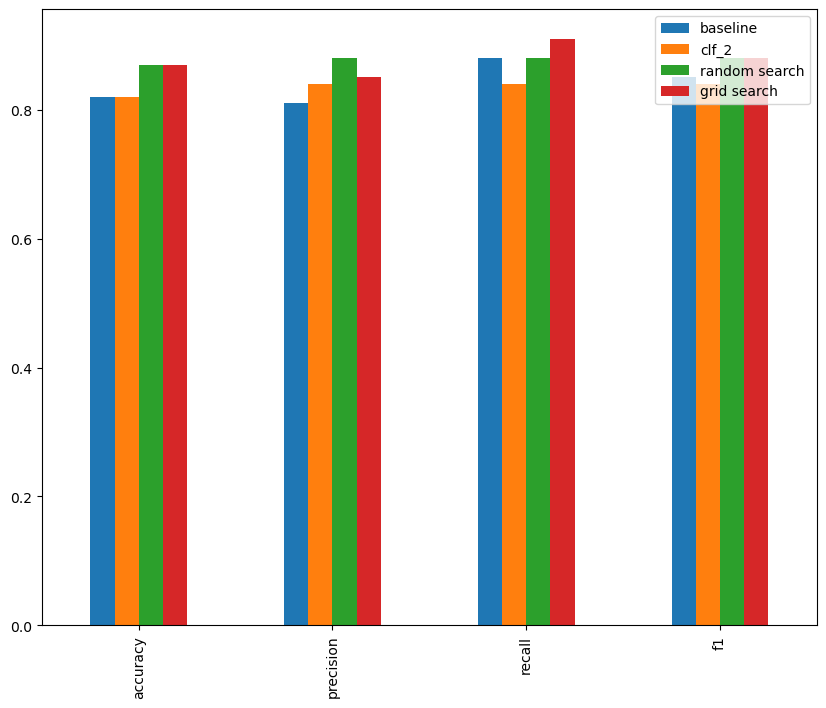

In [70]:
compare_metrics = pd.DataFrame({"baseline": baseline_metrics,
                                "clf_2": clf_2_metrics,
                                "random search": rs_metrics,
                                "grid search": gs_metrics})
compare_metrics.plot.bar(figsize=(10, 8));

## 6. Saving and loading trained machine learning models

#### Pickle

In [71]:
import pickle

# Save an existing model to file
pickle.dump(gs_clf, open("gs_random_forest_model_1.pkl", "wb"))

In [72]:
# Load a saved model
loaded_pickle_model = pickle.load(open("gs_random_forest_model_1.pkl", "rb"))

In [73]:
# Make predictions and evaluate the loaded model
pickle_y_preds = loaded_pickle_model.predict(X_test)
evaluate_preds(y_test, pickle_y_preds)

Acc: 86.89%
Precision: 0.85
Recall: 0.91
F1 score: 0.88


{'accuracy': 0.87, 'precision': 0.85, 'recall': 0.91, 'f1': 0.88}

#### Using `joblib`

In [74]:

from joblib import dump, load

# Save a model to file
dump(gs_clf, filename="gs_random_forest_model_1.joblib") 

['gs_random_forest_model_1.joblib']

In [75]:

# Import a saved joblib model
loaded_joblib_model = load(filename="gs_random_forest_model_1.joblib")

In [77]:

# Make and evaluate joblib predictions 
joblib_y_preds = loaded_joblib_model.predict(X_test)
evaluate_preds(y_test, joblib_y_preds)

Acc: 86.89%
Precision: 0.85
Recall: 0.91
F1 score: 0.88


{'accuracy': 0.87, 'precision': 0.85, 'recall': 0.91, 'f1': 0.88}

## 7.Putting it all together

In [79]:
data=pd.read_csv("car-sales-extended-missing-data.csv")

In [80]:
data.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [82]:
data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [88]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split,GridSearchCV
import numpy as np
np.random.seed(42)
data=pd.read_csv("car-sales-extended-missing-data.csv")
data.dropna(subset=["Price"],inplace=True)
categorical_features=["Make","Colour"]
categorical_transformer=Pipeline(steps=[
    ("imputer",SimpleImputer(strategy="constant",fill_value="missing")),
    ("onehot",OneHotEncoder(handle_unknown="ignore"))])
door_features=["Doors"]
door_transformer=Pipeline(steps=[
    ("imputer",SimpleImputer(strategy="constant",fill_value=4))])
numeric_features=["Odometer (KM)"]
numeric_transformer=Pipeline(steps=[
    ("imputer",SimpleImputer(strategy="mean"))])

preprocessor = ColumnTransformer(
    transformers=[
        ("cat", categorical_transformer, categorical_features),
        ("door", door_transformer, door_features),
        ("num", numeric_transformer, numeric_features)])

# Create a preprocessing and modelling pipeline
model = Pipeline(steps=[("preprocessor", preprocessor),
                        ("model", RandomForestRegressor())])

# Split data
X = data.drop("Price", axis=1)
y = data["Price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Fit and score the model
model.fit(X_train, y_train)
model.score(X_test, y_test)


0.22188417408787875